In [ ]:
#Installations and Dependencies
#Model 1: Logistic Regression
#Model 2: CNN

!pip install numpy
!pip install sklearn
!pip install imagehash
!pip install Pillow

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import imagehash
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
#from sklearn.metrics import accuracy_score, top_k_accuracy_score, mean_squared_error
from sklearn.neighbors import KDTree
from PIL import Image, ImageOps
from google.colab import drive
import pickle

drive.mount("/content/drive", force_remount=True)
import os
os.chdir("/content/drive/MyDrive/Team_Bread/")




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive


In [ ]:
#Data Set-up
#data = np.loadtxt('data.csv')
#y = last row of data

In [ ]:
#before looping through images
data = np.zeros((D,))
#with image
data = np.vstack((data, flat))
#after all images are looped through
data = np.delete(data, 0, 0)



NameError: ignored

In [ ]:
#New dataset stuff ahhdghdgsgja

## new dataset stuff 
#path = "/content/drive/MyDrive/Team_Bread/"

#local_download_path = os.path.expanduser('/content/drive/MyDrive/Team_Bread/')
#data = []

#for filename in os.listdir(local_download_path):
      # Your code comes here such as 
  #    print(filename)
     # data.append(filename)
#print(data)
data = np.zeros((1600,))
#with image

#after all images are looped through


path = "/content/drive/MyDrive/Team_Bread/dataset"

  
# Get the list of all files and directories
# in current working directory
labels = []
foldernum = 0
label_map = {}

dir_list = os.listdir(path)
for charFolder in dir_list:
  print(charFolder)
  label_map.update({foldernum: charFolder})
  string = path + '/' + charFolder + "/"
  for ImgFile in  os.listdir(string):
    if (ImgFile.endswith("png") | ImgFile.endswith("jpg")):
      str2 = string + ImgFile #gets path to particular img
      img = Image.open(str2)
      bw = ImageOps.grayscale(img) ##grayscaled img 
      bw = bw.resize((40,40))  #was 40,40
      npdatatest = np.asarray(bw)
      l = npdatatest.flatten()
      data = np.vstack((data, l))
      #print(l.shape)
      #print(l.size)
      labels.append(foldernum)
  foldernum = foldernum + 1
data = np.delete(data, 0, 0)


print(path)
print(dir_list)


#path = "/content/drive/MyDrive/Team_Bread/dataset"
#for charFile in os.listdir(path):
 # for image in charFile:









z
eq
9
sub
y
add
mul
x
dec
div
3
2
8
6
5
4
7
1
0
/content/drive/MyDrive/Team_Bread/dataset
['z', 'eq', '9', 'sub', 'y', 'add', 'mul', 'x', 'dec', 'div', '3', '2', '8', '6', '5', '4', '7', '1', '0']


In [ ]:
#Dimensionality Reduction - Model 1: Logistic Regression
pca = PCA(n_components=150)
imgs_reduced = pca.fit_transform(data)
X = imgs_reduced
#X.reshape(-1, 1)


In [ ]:
#Show reduction


In [ ]:
#Model 1: Logistic Regression
#https://www.datacamp.com/tutorial/understanding-logistic-regression-python 
#class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, 
#class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
M1 = LogisticRegression(C=1000000, solver="sag", max_iter=1000)
#spliting data
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
label = np.array(labels)
xtrain, xtest, ytrain, ytest = train_test_split(X, label, test_size=0.25, random_state=1)

M1.fit(xtrain, ytrain)

ypred = M1.predict(xtest)



In [ ]:
#Results/Analysis/Plot - Model 1: Logistic Regression
#https://scikit-learn.org/stable/modules/model_evaluation.html 
#accurcy, k top accurcy, rmse
# plot accuracy vs. dataset size
# plot loss vs. d
print()
print("xtest.shape = " + str(xtest.shape))
print("xtrain.shape = " + str(xtrain.shape))
print("ytest.shape = " + str(ytest.shape))
print("ytrain.shape = " + str(ytrain.shape))
print("ypred.shape = " + str(ypred.shape))
#loss = sklearn.metrics.mean_absolute_error(ytest, ypred)
#accuracy = sklearn.metrics.accuracy_score(ytest, ypred)
#kaccuracy = top_k_accuracy_score(ytest, ypred,)
print(sklearn.metrics.classification_report(ytest, ypred, target_names=dir_list))

#cmatr = sklearn.metrics.confusion_matrix(ytest, ypred, labels=dir_list)
#disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cmatr, display_labels=dir_list)
#disp.plot()
#plt.show()

#fig1, plt_loss = plt.subplots()
#fig2, plt_accuracy = plt.subplots()
#fig3, plt_kaccuracy = plt.subplots()

#plt_loss.plot(1, loss, 'b')
#plt_loss.set_xlabel('Epoch #')
#plt_loss.set_ylabel('Loss')
#plt_loss.set_title('Model Loss')

#plt_accuracy.plot(range(len(accuracy)), accuracy, 'b')
#plt_accuracy.set_xlabel('Dataset Size')
#plt_accuracy.set_ylabel('Accuracy')
#plt_accuracy.set_title('Model Accuracy')

#plt_kaccuracy.plot(range(len(kaccuracy)), kaccuracy, 'b')
#plt_kaccuracy.set_xlabel('Dataset Size')
#plt_kaccuracy.set_ylabel('Top-K Accuracy')
#plt_kaccuracy.set_title('Model Top-K Accuracy')



xtest.shape = (2518, 150)
xtrain.shape = (7553, 150)
ytest.shape = (2518,)
ytrain.shape = (7553,)
ypred.shape = (2518,)
              precision    recall  f1-score   support

           z       0.54      0.40      0.46        55
          eq       0.56      0.57      0.57       163
           9       0.48      0.40      0.43       139
         sub       0.53      0.76      0.63       159
           y       0.45      0.42      0.44       109
         add       0.59      0.54      0.56       149
         mul       0.59      0.64      0.61       122
           x       0.31      0.33      0.32       113
         dec       0.52      0.94      0.67       176
         div       0.61      0.60      0.60       148
           3       0.38      0.24      0.29       131
           2       0.38      0.35      0.36       107
           8       0.46      0.30      0.36       161
           6       0.37      0.35      0.36       128
           5       0.51      0.44      0.47       100
           4  

https://www.geeksforgeeks.org/how-to-convert-an-image-to-numpy-array-and-saveit-to-csv-file-using-python/
https://www.w3schools.com/python/pandas/pandas_cleaning.asp


In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
#Dimensionality Reduction - Model 2: CNN
#Do we need this?

In [ ]:
#Model 2: CNN
"""
layers: (taken from hw4)
INPUT - CONV - CONV - MAXPOOL - DROPOUT - CONV - CONV - MAXPOOL - DROPOUT - FC1 - DROPOUT - FC2 - DROPOUT - FC3
"""

In [ ]:
!pip install tensorflow

import tensorflow as tf
import tensorflow_datasets as tfds
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from sklearn.utils import shuffle
import sklearn.metrics
import numpy as np
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def create_net(self):
        '''
        In this function you are going to build a convolutional neural network based on TF Keras.
        First, use Sequential() to set the inference features on this model. 
        Then, use model.add() to build layers in your own model
        Return: model
        '''
        
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Conv2D(8, 3, padding='same', input_shape=(40,40,3)))
        model.add(tf.keras.layers.LeakyReLU(alpha=self.init_lr))
        model.add(tf.keras.layers.Conv2D(32, 3, padding='same'))
        model.add(tf.keras.layers.LeakyReLU(alpha=self.init_lr))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
        model.add(tf.keras.layers.Dropout(.3))
        model.add(tf.keras.layers.Conv2D(32, 3, padding='same'))
        model.add(tf.keras.layers.LeakyReLU(alpha=self.init_lr))
        model.add(tf.keras.layers.Conv2D(64, 3, activation = 'relu', padding='same'))
        model.add(tf.keras.layers.LeakyReLU(alpha=self.init_lr))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
        model.add(tf.keras.layers.Dropout(.3))
        model.add(Flatten())
        model.add(tf.keras.layers.Dense(256))
        model.add(tf.keras.layers.LeakyReLU(alpha=self.init_lr))
        model.add(tf.keras.layers.Dropout(.5))
        model.add(tf.keras.layers.Dense(128))
        model.add(tf.keras.layers.LeakyReLU(alpha=self.init_lr))
        model.add(tf.keras.layers.Dropout(.5))
        model.add(tf.keras.layers.Dense(10))
        model.add(tf.keras.layers.Softmax())
        self.model = model
    
        return model

In [ ]:
path = '/content/drive/MyDrive/Team_Bread/dataset'
#data = tf.keras.utils.image_dataset_from_directory(directory = path, labels = 'inferred')
#training_size = int(10071 * .8)
#ds_train = data.take(training_size) 
#ds_test = data.skip(training_size)
epochs = 5
batch_size = 32
img_height = 180
img_width = 180
train_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = 19

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(.3),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(.3),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(.3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(.5),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Found 10071 files belonging to 19 classes.
Using 8057 files for training.
Found 10071 files belonging to 19 classes.
Using 2014 files for validation.
Epoch 1/5
252/252 [==============================] - 1077s 4s/step - loss: 2.4722 - accuracy: 0.2528 - val_loss: 1.5408 - val_accuracy: 0.5745
Epoch 2/5
252/252 [==============================] - 346s 1s/step - loss: 1.3962 - accuracy: 0.5747 - val_loss: 0.9162 - val_accuracy: 0.7418
Epoch 3/5
252/252 [==============================] - 348s 1s/step - loss: 0.9731 - accuracy: 0.6874 - val_loss: 0.7003 - val_accuracy: 0.7974
Epoch 4/5
252/252 [==============================] - 343s 1s/step - loss: 0.7446 - accuracy: 0.7618 - val_loss: 0.5121 - val_accuracy: 0.8550
Epoch 5/5
252/252 [==============================] - 345s 1s/step - loss: 0.6091 - accuracy: 0.8049 - val_loss: 0.4440 - val_accuracy: 0.8759


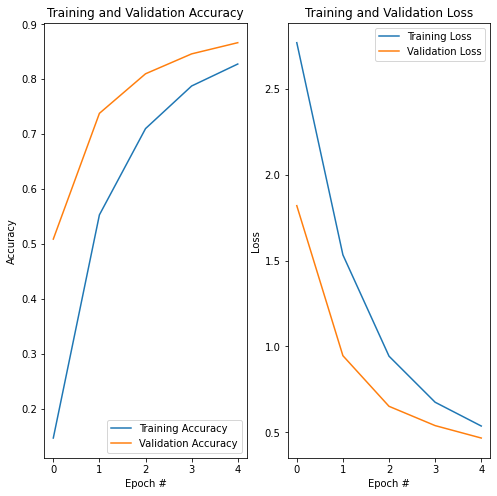

63/63 [==============================] - 24s 381ms/step


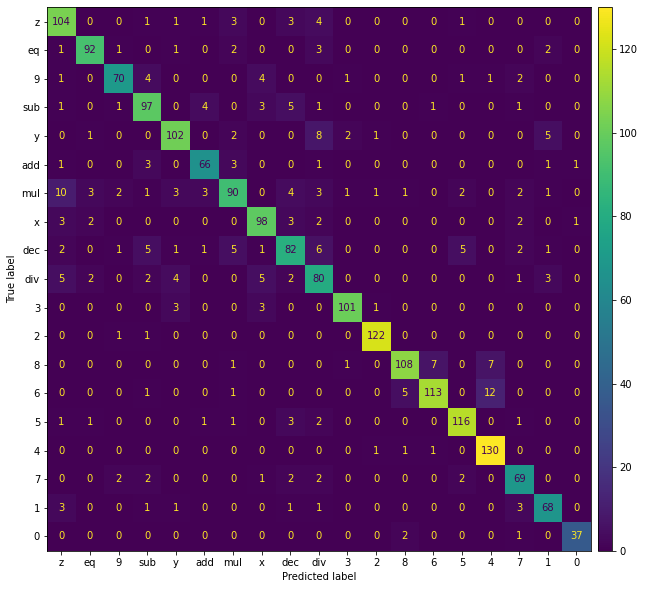

              precision    recall  f1-score   support

           z       0.79      0.88      0.83       118
          eq       0.91      0.90      0.91       102
           9       0.90      0.83      0.86        84
         sub       0.82      0.85      0.84       114
           y       0.88      0.84      0.86       121
         add       0.87      0.87      0.87        76
         mul       0.83      0.71      0.77       127
           x       0.85      0.88      0.87       111
         dec       0.78      0.73      0.76       112
         div       0.71      0.77      0.74       104
           3       0.95      0.94      0.94       108
           2       0.97      0.98      0.98       124
           8       0.92      0.87      0.90       124
           6       0.93      0.86      0.89       132
           5       0.91      0.92      0.92       126
           4       0.87      0.98      0.92       133
           7       0.82      0.86      0.84        80
           1       0.84    

In [ ]:
#Results/Analysis/Plot - Model 2: CNN
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

dir_list = ['z', 'eq', '9', 'sub', 'y', 'add', 'mul', 'x', 'dec', 'div', '3', '2', '8', '6', '5', '4', '7', '1', '0']

y_pred = model.predict(test_ds)
y_pred = tf.nn.softmax(y_pred)
y_pred = tf.argmax(y_pred, axis=1)
y_true = tf.concat([y for x, y in test_ds], axis=0)
matr = sklearn.metrics.confusion_matrix(y_true, y_pred)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=matr, display_labels=dir_list)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, colorbar=False)
# Deactivate default colorbar

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(disp.im_,  cax=cax)
plt.show()

print(sklearn.metrics.classification_report(y_true, y_pred, target_names=dir_list))

In [ ]:
#Comparison